In [99]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import plotly.express as px

In [16]:
path = 'Traindata/Audio/'
classes = os.listdir(path)

In [17]:
classes.remove('.DS_Store')

In [18]:
classes

['Patagioenas plumbea_Plumbeous Pigeon',
 'Turdus hauxwelli_Hauxwell_s Thrush',
 'Formicarius analis_Black-faced Antthrush',
 'Pachysylvia hypoxantha_Dusky-capped Greenlet',
 'Campylorhynchus turdinus_Thrush-like Wren',
 'Trogon melanurus_Black-tailed Trogon']

In [19]:
print(f'Total Bird Species {len(classes)}')

Total Bird Species 6


In [20]:
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))

print(f'Total number of audio file in dataset: {sum(list(counts.values()))}')

Total number of audio file in dataset: 566


In [21]:
counts

{'Patagioenas plumbea_Plumbeous Pigeon': 100,
 'Turdus hauxwelli_Hauxwell_s Thrush': 79,
 'Formicarius analis_Black-faced Antthrush': 100,
 'Pachysylvia hypoxantha_Dusky-capped Greenlet': 87,
 'Campylorhynchus turdinus_Thrush-like Wren': 100,
 'Trogon melanurus_Black-tailed Trogon': 100}

In [192]:
df = pd.DataFrame(list(counts.values()), list(counts.keys()))
fig = px.bar(x=list(counts.values()), y=list(counts.keys()) , orientation='h',)
fig.show()

In [124]:
name_bird = []
for root, dirs, files in os.walk('Traindata/Audio/'):
    if root == 'Traindata/Audio/':
        name_bird = dirs

In [125]:
name_bird

['Patagioenas plumbea_Plumbeous Pigeon',
 'Turdus hauxwelli_Hauxwell_s Thrush',
 'Formicarius analis_Black-faced Antthrush',
 'Pachysylvia hypoxantha_Dusky-capped Greenlet',
 'Campylorhynchus turdinus_Thrush-like Wren',
 'Trogon melanurus_Black-tailed Trogon']

In [130]:
path_name = []
path_name_list = []
for i in range(len(name_bird)):
    for root, dirs, files in os.walk("Traindata/Audio/"+name_bird[i]):
        for file in files:
            if file.endswith(".mp3"):
                path_name.append(os.path.join(root, file))
    path_name_list.append(path_name)
    path_name = []

In [151]:
path_name_list[0][37]

'Traindata/Audio/Patagioenas plumbea_Plumbeous Pigeon/XC391559.mp3'

In [311]:
time = []
time_list = []
sr = []
sr_list = []
for i in range(len(path_name_list)):
    for j in path_name_list[i]:
        time.append(librosa.get_duration(filename=j))
        sr.append(librosa.get_samplerate(j))
    time_list.append(time)
    time = []
    sr_list.append(sr)
    sr = []

In [312]:
sr_list

[[44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  8000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  44100],
 [48000,
  48000,
  48000,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  48000,
  44100,
 

In [313]:
samplerate = []
for i in range(len(sr_list)):
    for j in sr_list[i]:
        if j in samplerate:
            pass
        else:
            samplerate.append(j)

In [314]:
samplerate.sort()

In [315]:
samplerate

[8000, 11025, 16000, 22050, 32000, 44100, 48000]

In [316]:
sr8000 = 0
sr11025 = 0
sr16000 = 0
sr22050 = 0
sr32000 = 0
sr44100 = 0
sr48000 = 0

for i in range(len(sr_list)):
    for j in sr_list[i]:
        if j == 8000:
            sr8000 += 1
        elif j == 11025:
            sr11025 += 1
        elif j == 16000:
            sr16000 += 1
        elif j == 22050:
            sr22050 += 1
        elif j == 32000:
            sr32000 += 1
        elif j == 44100:
            sr44100 += 1
        elif j == 48000:
            sr48000 += 1

In [317]:
sr8000

1

In [345]:
sr11025

1

In [319]:
sr16000

30

In [320]:
sr22050

11

In [321]:
sr32000

9

In [322]:
sr44100

416

In [323]:
sr48000

98

In [324]:
count_sr_list = list((sr8000, sr11025, sr16000, sr22050, sr32000, sr44100, sr48000))

In [325]:
count_sr_list

[1, 1, 30, 11, 9, 416, 98]

In [329]:
text_samplerate = []
for i in samplerate:
    text_samplerate.append(str(i))

In [330]:
text_samplerate

['8000', '11025', '16000', '22050', '32000', '44100', '48000']

In [247]:
df = pd.DataFrame(count_sr_list, columns=samplerate)

In [248]:
df

,8000,11025,16000,22050,32000,44100,48000
0,1,0,0,0,0,86,13
1,0,1,15,1,1,45,16
2,0,0,0,5,1,76,18
3,0,0,12,1,1,58,15
4,0,0,0,2,4,79,15
5,0,0,3,2,2,72,21


In [346]:
fig = px.bar(df, x=samplerate, y=count_sr_list, text=count_sr_list, )
fig.update_traces(texttemplate='%{text: d}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_type='category')
fig.show()

In [179]:
name = ['Name']
max_time = ['Max_time']
min_time = ['Min_time']
avg_time = ['Avg_time']
for i in range(6):
    name.append(name_bird[i])
    max_time.append(round(max(time_list[i]), 2))
    min_time.append(round(min(time_list[i]), 2))
    avg_time.append(round(sum(time_list[i])/len(time_list[i]), 2))

In [180]:
zippedList =  list(zip(name, max_time, min_time, avg_time))
sound_infor = pd.DataFrame(zippedList, columns=zippedList[0])
sound_infor.drop([0])

,Name,Max_time,Min_time,Avg_time
1,Patagioenas plumbea_Plumbeous Pigeon,350.28,3,43.4
2,Turdus hauxwelli_Hauxwell_s Thrush,205.61,2.62,49.46
3,Formicarius analis_Black-faced Antthrush,241.67,1.92,48.91
4,Pachysylvia hypoxantha_Dusky-capped Greenlet,99.29,3.74,30.7
5,Campylorhynchus turdinus_Thrush-like Wren,144.77,2.8,28.52
6,Trogon melanurus_Black-tailed Trogon,175.12,6.76,47.15


In [181]:
sum(time_list[0])/len(time_list[0])

43.399404353741495

In [176]:
round(max(time_list[0]), 2)

350.28

In [162]:
avg_time

['Avg_time',
 43.399404353741495,
 49.45644896344615,
 48.90738171201815,
 30.695955002019964,
 28.521256991921767,
 47.14967965206915]

In [50]:
for i in range(6):
    print(list(counts.keys()))

Patagioenas plumbea_Plumbeous Pigeon
Turdus hauxwelli_Hauxwell_s Thrush
Formicarius analis_Black-faced Antthrush
Pachysylvia hypoxantha_Dusky-capped Greenlet
Campylorhynchus turdinus_Thrush-like Wren
Trogon melanurus_Black-tailed Trogon


In [51]:
list(counts.keys())

['Patagioenas plumbea_Plumbeous Pigeon',
 'Turdus hauxwelli_Hauxwell_s Thrush',
 'Formicarius analis_Black-faced Antthrush',
 'Pachysylvia hypoxantha_Dusky-capped Greenlet',
 'Campylorhynchus turdinus_Thrush-like Wren',
 'Trogon melanurus_Black-tailed Trogon']

In [365]:
namesound01 = path_name_list[0][1].split('/')

In [366]:
namesound00 = path_name_list[0][0].split('/')
namesound

['Traindata', 'Audio', 'Patagioenas plumbea_Plumbeous Pigeon', 'XC124883.mp3']

/Users/givee/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning:

PySoundFile failed. Trying audioread instead.

/Users/givee/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning:

PySoundFile failed. Trying audioread instead.



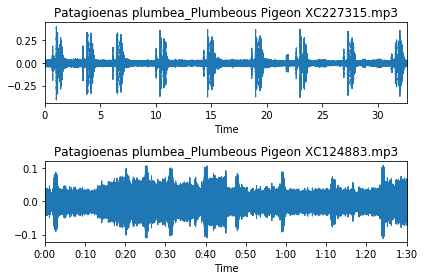

In [367]:
plt.figure()
plt.subplot(2, 1, 1)
y, sr = librosa.load(path_name_list[0][0])
librosa.display.waveplot(y, sr=sr)
plt.title(namesound00[-2]+' '+namesound00[-1])


plt.subplot(2,1,2)
y, sr = librosa.load(path_name_list[0][1])
librosa.display.waveplot(y, sr=sr)
plt.title(namesound01[-2]+' '+namesound01[-1])
plt.tight_layout()